In [1]:
import numpy as np
import pandas as pd
import emcee
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## Rosenbrock Density

In [2]:
# define ln_f(theta) as function where a single argument theta = (theta1, theta2)
def lnprob(theta):
    return -1./20 * (100*(theta[1] - theta[0]**2)**2 + (1-theta[0])**2)

In [3]:
# create meshgrid and associated lnprobs 
xx, yy = np.mgrid[-10:10:.01, -10:10:.01]
print('xx shape: {} | yy shape: {}'.format(xx.shape, yy.shape))
pos = np.vstack([xx.ravel(), yy.ravel()])
print('pos shape: {}'.format(pos.shape))
n_pos = xx.shape[0] * xx.shape[1]
lnprobs = np.array([lnprob(pos[:,i]) for i in range(n_pos)])
lnprobs = np.reshape(lnprobs, xx.shape)
print('lnprobs shape: {}'.format(lnprobs.shape))

xx shape: (2000, 2000) | yy shape: (2000, 2000)
pos shape: (2, 4000000)
lnprobs shape: (2000, 2000)


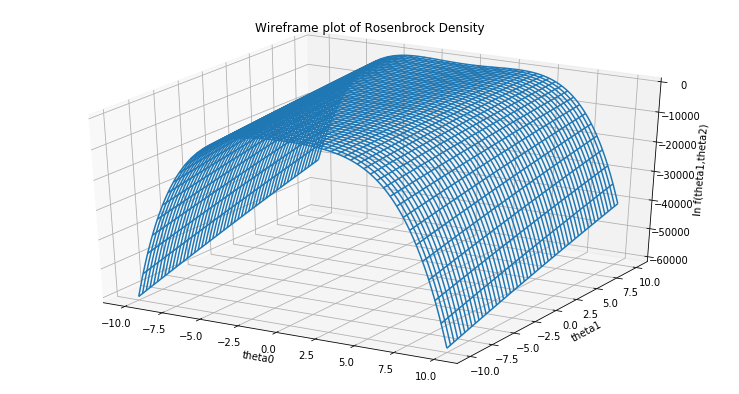

In [4]:
# create the plot
fig = plt.figure(figsize=(13, 7))
ax = fig.gca(projection='3d')
w = ax.plot_wireframe(xx, yy, lnprobs)
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('ln f(theta1,theta2)')
ax.set_title('Wireframe plot of Rosenbrock Density');

## My Sampler

In [66]:
def draw_from_q(x):
    return np.random.multivariate_normal(mean=[x[0],x[1]], cov=[[10,0],[0,10]])

In [68]:
class mySampler():
    
    # TODO: compute acceptance proportion
    # TODO: add burn in
    # TODO: add multiple walkers
    
    def __init__(self, density, proposal): 
        self.density = density 
        self.proposal = draw_from_q
    
    def run_mcmc(self, steps, initial_x): 
        samples = [] 
        x = initial_x
        for i in range(steps):
            r = np.random.uniform()
            proposed_x = draw_from_q(x)
            if lnprob(proposed_x) - lnprob(x) > np.log(r):
                x = proposed_x
            samples.append(x)
        self.samples = np.array(samples)
        return self.samples

In [69]:
my_sampler = mySampler(lnprob, draw_from_q)
samples = my_sampler.run_mcmc(steps=10**5, initial_x=(0,0))

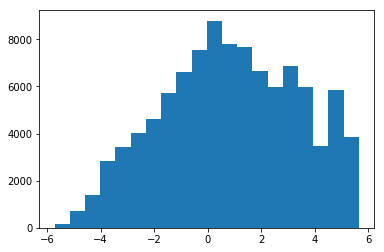

In [70]:
plt.hist(samples[:,0], bins=20);

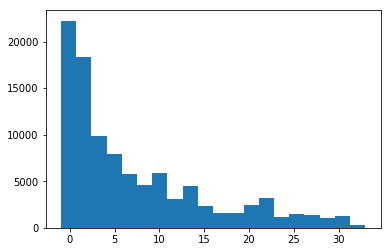

In [71]:
plt.hist(samples[:,1], bins=20);

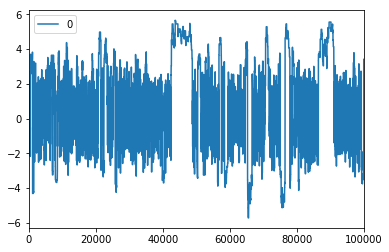

In [72]:
pd.DataFrame(samples[:,0]).plot()

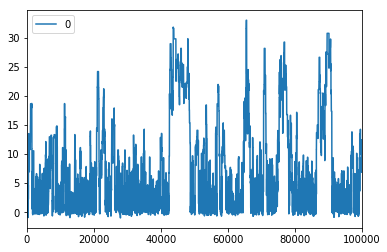

In [73]:
pd.DataFrame(samples[:,1]).plot()

In [ ]:
# def mh_simple(steps):
#     samples = []
#     x = [0,0]
#     for i in range(steps):
#         r = np.random.uniform()
#         new_x = draw_from_q(x)
#         if lnprob(new_x) - lnprob(x) > np.log(r):
#             x = new_x 
#         samples.append(x)
#     return np.array(samples)

## Using emcee 

In [80]:
ndim, nwalkers = 2, 100
theta0 = np.random.rand(ndim*nwalkers).reshape((nwalkers, ndim))
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob)
pos, prob, state = sampler.run_mcmc(theta0, 100);
sampler.reset() 

In [81]:
sampler.run_mcmc(pos, 10**4);

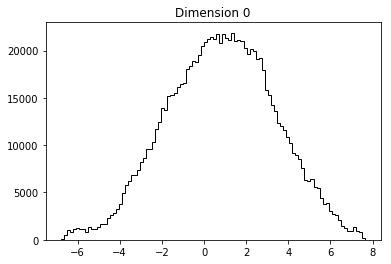

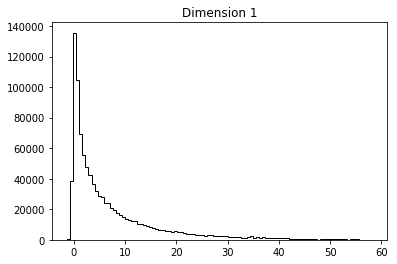

In [82]:
for i in range(ndim):
    plt.figure()
    plt.hist(sampler.flatchain[:,i], 100, color="k", histtype="step")
    plt.title("Dimension {0:d}".format(i))

In [83]:
print("Mean acceptance fraction: {0:.3f}".format(np.mean(sampler.acceptance_fraction)))

Mean acceptance fraction: 0.268
